In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [40]:
signups = pd.read_csv('data_file.csv')

In [41]:
signups
#importing the raw data set

,stat_week,stat_month,stat_day,user_id,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed
0,42,10,26,1,1,1,2,0,0,2
1,42,10,26,2,1,1,2,0,0,3
2,42,10,26,3,1,1,2,0,0,2
3,42,10,26,4,1,1,2,0,0,3
4,42,10,26,5,2,1,2,0,0,5
5,42,10,26,6,1,2,0,0,0,0
6,42,10,26,7,1,1,0,0,0,1
7,42,10,26,8,2,1,36,0,0,1
8,42,10,26,9,1,3,0,0,0,1
9,42,10,26,10,2,2,1,0,0,1


In [94]:
signups.describe()
##high level statistical summary of the raw data set
## use this to validate snowflake function outputs -- it looks like snowflake
## function is off by magnitude of scale (although directionally accurate)
## this is all at the user/daily level






,stat_week,stat_month,stat_day,user_id,stats_trackers_created,stats_sent_notifications_desktop,stats_gmail_insights_viewed,stats_insights_viewed,stats_activities_zapier,stats_stream_viewed
count,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.0,6456.000000
mean,39.674566,9.717937,15.006196,3228.500000,1.655514,2.394362,3.107497,0.013011,0.0,3.236679
std,1.300972,0.450039,9.084164,1863.831001,2.077874,5.849970,10.531730,0.290545,0.0,2.790333
min,38.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,39.000000,9.000000,7.000000,1614.750000,1.000000,1.000000,0.000000,0.000000,0.0,2.000000
50%,40.000000,10.000000,15.000000,3228.500000,1.000000,1.000000,1.000000,0.000000,0.0,3.000000
75%,41.000000,10.000000,24.000000,4842.250000,2.000000,2.000000,3.000000,0.000000,0.0,4.000000
max,42.000000,10.000000,30.000000,6456.000000,66.000000,293.000000,412.000000,16.000000,0.0,50.000000


In [106]:
import pandas as pd
stats_agg_by_date = pd.read_csv('stats_agg_by_date.csv')


###bringing in the table I created to aggregate by date to do more exploration

In [107]:
import matplotlib.pyplot as plt

In [108]:
import numpy as np

In [109]:
import csv


In [110]:
df = stats_agg_by_date
df
## results are summarized at the app daily level

,SIGNUP_DAY,COUNT_USERS,STATS_TRACKERS_CREATED,STATS_SENT_NOTIFICATIONS_DESKTOP,STATS_GMAIL_INSIGHTS_VIEWED,STATS_INSIGHTS_VIEWED,STATS_ACTIVITIES_ZAPIER,STATS_STREAM_VIEWED
0,1,173,313,380,568,4,0,602
1,2,262,403,478,696,0,0,964
2,3,230,364,399,542,0,0,832
3,4,299,471,532,909,16,0,959
4,5,231,385,631,806,2,0,747
5,6,182,235,270,356,0,0,525
6,7,93,125,163,162,0,0,240
7,8,173,279,359,503,0,0,574
8,9,178,306,471,738,1,0,573
9,10,339,638,1426,1647,8,0,1021


In [111]:
df.shape
## summarizes the size(rows) and width (columns) of the data

(35, 8)

In [112]:
df.describe()
## high-level statistical summary of the data set

,SIGNUP_DAY,COUNT_USERS,STATS_TRACKERS_CREATED,STATS_SENT_NOTIFICATIONS_DESKTOP,STATS_GMAIL_INSIGHTS_VIEWED,STATS_INSIGHTS_VIEWED,STATS_ACTIVITIES_ZAPIER,STATS_STREAM_VIEWED
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000
mean,18.000000,184.457143,305.371429,441.657143,573.200000,2.400000,0.0,597.028571
std,10.246951,71.009255,126.349675,241.079794,322.899438,3.388562,0.0,262.528596
min,1.000000,60.000000,78.000000,97.000000,98.000000,0.000000,0.0,158.000000
25%,9.500000,130.500000,230.000000,309.000000,373.500000,0.000000,0.0,424.000000
50%,18.000000,178.000000,297.000000,412.000000,532.000000,1.000000,0.0,573.000000
75%,26.500000,232.500000,410.500000,536.000000,704.000000,3.500000,0.0,808.000000
max,35.000000,339.000000,638.000000,1426.000000,1647.000000,16.000000,0.0,1027.000000


In [ ]:
### The following graphs are histograms representing the frequency and distribution of signups 
### and each one of the usage points

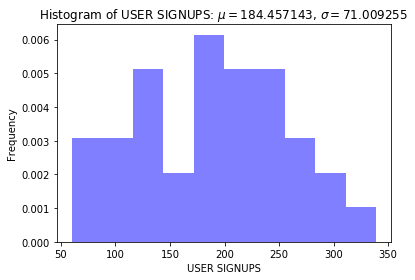

In [64]:
num_bins = 10
plt.hist(df['COUNT_USERS'], num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('Daily USER SIGNUPS')
plt.ylabel('Frequency')
plt.title(r'Histogram of USER SIGNUPS: $\mu=184.457143	$, $\sigma= 71.009255	$')
plt.show()

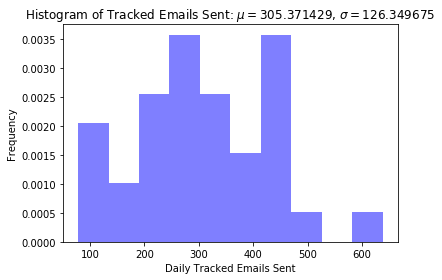

In [116]:
num_bins = 10
plt.hist(df['STATS_TRACKERS_CREATED'], num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('Daily Tracked Emails Sent')
plt.ylabel('Frequency')
plt.title(r'Histogram of Tracked Emails Sent: $\mu=441.657143	$, $\sigma= 126.349675$')
plt.show()

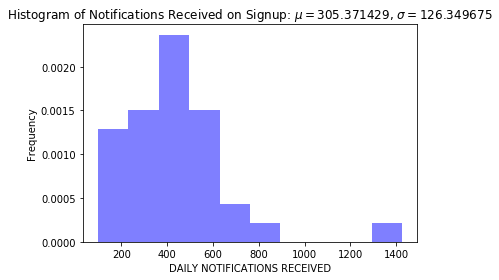

In [113]:
num_bins = 10
plt.hist(df['STATS_SENT_NOTIFICATIONS_DESKTOP'], num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('DAILY NOTIFICATIONS RECEIVED')
plt.ylabel('Frequency')
plt.title(r'Histogram of Notifications Received on Signup: $\mu=305.371429$, $\sigma= 126.349675$')
plt.show()
plt.show()

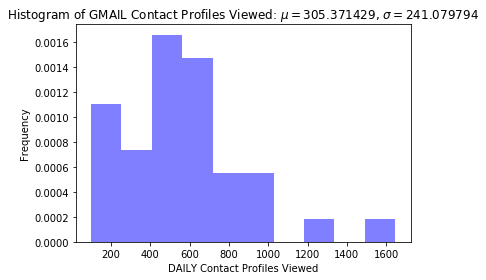

In [119]:
num_bins = 10
plt.hist(df['STATS_GMAIL_INSIGHTS_VIEWED'], num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('DAILY Contact Profiles Viewed')
plt.ylabel('Frequency')
plt.title(r'Histogram of GMAIL Contact Profiles Viewed: $\mu=305.371429$, $\sigma= 241.079794	$')
plt.show()
plt.show()

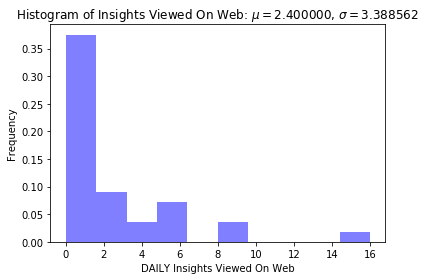

In [120]:

num_bins = 10
plt.hist(df['STATS_INSIGHTS_VIEWED'], num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('DAILY Insights Viewed On Web')
plt.ylabel('Frequency')
plt.title(r'Histogram of Insights Viewed On Web: $\mu=2.400000$, $\sigma= 3.388562	$')
plt.show()
plt.show()

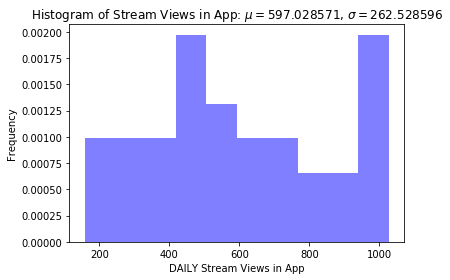

In [122]:

num_bins = 10
plt.hist(df['STATS_STREAM_VIEWED'], num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.xlabel('DAILY Stream Views in App')
plt.ylabel('Frequency')
plt.title(r'Histogram of Stream Views in App: $\mu=597.028571$, $\sigma= 262.528596	$')
plt.show()
plt.show()

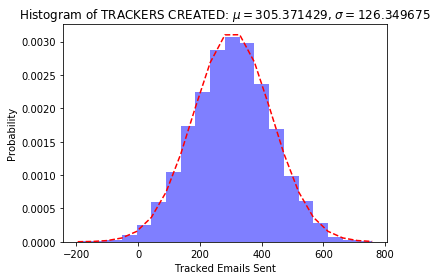

In [67]:
### With More time I could have explored more normalized histograms that would be
### somewhat easier to read given the variability of this data set. Below is 1 example

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
 
# stats_trackers_created: number of tracked emails user sent the day they signed up
mu = 305.371429	 # mean of distribution
sigma = 126.349675 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Tracked Emails Sent')
plt.ylabel('Probability')
plt.title(r'Histogram of TRACKERS CREATED: $\mu=305.371429$, $\sigma= 126.349675$')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

Below I creatd some basic line plots (generated by my SQL output files) to visualize the daily aggregated app use over the 35 day window.

This provides a quick glance to spot trends + anomolies to me  figure out where to zoom in with further analysis.

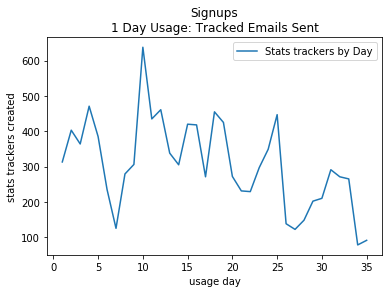

In [128]:
x = []
y = []

with open('stats_trackers_date.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',' )
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='Stats trackers by Day')
plt.xlabel('usage day')
plt.ylabel('stats trackers created')
plt.title('Signups\n1 Day Usage: Tracked Emails Sent')
plt.legend()
plt.show()

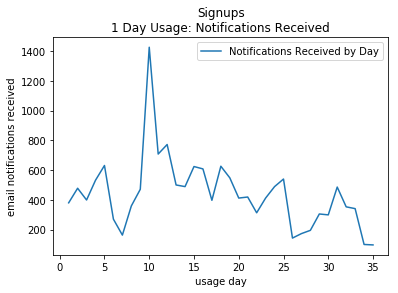

In [127]:
x = []
y = []

with open('stats_notifications_sent_desktop.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',' )
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='Notifications Received by Day')
plt.xlabel('usage day')
plt.ylabel('email notifications received')
plt.title('Signups\n1 Day Usage: Notifications Received')
plt.legend()
plt.show()

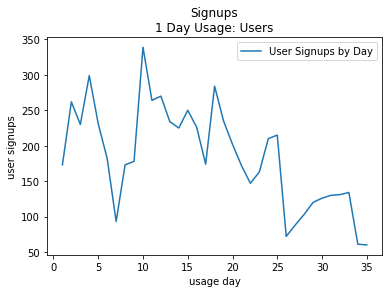

In [129]:
x = []
y = []

with open('users_by_day.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',' )
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='User Signups by Day')
plt.xlabel('usage day')
plt.ylabel('user signups')
plt.title('Signups\n1 Day Usage: Users')
plt.legend()
plt.show()

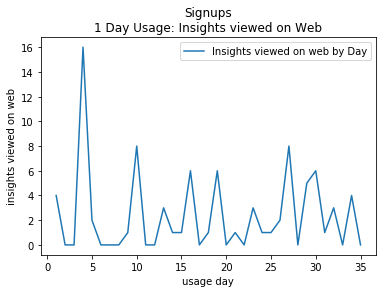

In [130]:
x = []
y = []

with open('stats_insights_viewed.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',' )
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='Insights viewed on web by Day')
plt.xlabel('usage day')
plt.ylabel('insights viewed on web')
plt.title('Signups\n1 Day Usage: Insights viewed on Web')
plt.legend()
plt.show()

really low use -- worth digging in to see why.

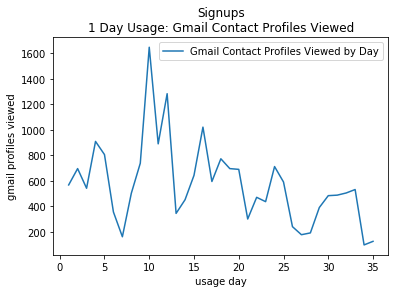

In [131]:
x = []
y = []

with open('stats_gmail_insights_viewed.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',' )
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='Gmail Contact Profiles Viewed by Day')
plt.xlabel('usage day')
plt.ylabel('gmail profiles viewed')
plt.title('Signups\n1 Day Usage: Gmail Contact Profiles Viewed')
plt.legend()
plt.show()

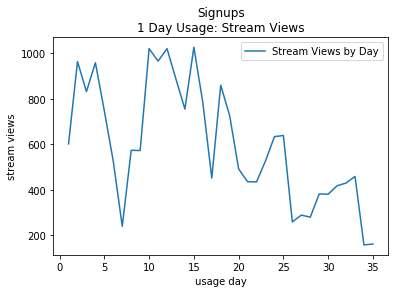

In [132]:
x = []
y = []

with open('stats_stream_viewed.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',' )
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='Stream Views by Day')
plt.xlabel('usage day')
plt.ylabel('stream views')
plt.title('Signups\n1 Day Usage: Stream Views')
plt.legend()
plt.show()